Brexit
===
How long could the data scientists predict the final of vote `correctly` before all the votes calculated? 

<a   href="http://predictablynoisy.com/could-the-brexit-have-happened-due-to-random-chance/">Link</a>

Prelude
---


**金庸**, 鹿鼎記

```
...
    第三日傍晚，韋小寶在廂房與馬超興及天地會眾兄弟閑談。御前侍衛班領張康年匆匆進來，叫了聲：「韋副總管。」便不再說下去，神色甚是尷尬。韋小寶見他左臉上腫了一塊，右眼烏黑，顯是跟人打架吃了虧，心想：「御前侍衛不去打人，人家已經偷笑了，有誰這樣大膽，竟敢打了他？」他不願御前侍衛在天地會兄弟前失了面子，向馬超興道：「馬大哥請寬坐，兄弟暫且失陪。」馬超興道：「好說。韋爵爺請便。」
    韋小寶走出廂房。張康年跟了出來，一到房外，便道：「稟告副總管：趙二哥給人家扣住了。」他說的趙二哥，便是御前侍衛的另…個領班趙齊賢。韋小寶罵道：「他媽的，誰有這般大膽，是柳州守備？還是知府衙門？犯了甚麼事？殺了人麼？」心想若不是犯了人命案子，當地官府決不敢扣押御前侍衛。
    張康年神色忸怩，說道：「不是官府扣的，是 ... 是在賭場裏。」韋小寶哈哈大笑，說道：「他奶奶的，柳州城的賭場膽敢扣押御前侍衛，當真是天大的新聞了。你們輸了錢，是不是？」張康年點點頭，苦笑道：「我們七個兄弟去賭錢，賭的是大小。他媽的，這賭場有鬼，竟一連開了十三記大，我們七個已輸了千多兩銀子。第十四記上，趙二哥和我都說，這一次非開小不可 ... 」韋小寶搖頭道：「錯了，錯了，多半還是開大。」張康年道：「可惜我們沒請副總管帶領去賭，否則也不會上這個當，我們七人把身邊的銀子銀票都掏了出來，押了個小。唉！」韋小寶笑道：「開了出來，又是個大。」
    張康年雙手一攤，作個無可奈何之狀，說道：「寶官要收銀子，我們就不許，說道天下賭場，那有連開十四個大之理，定是作弊。賭場主人出來打圓場，說道這次不算，不吃也不賠。趙二哥說不行，這次本來是小，寶官做了手腳，我們已輸了這麼多錢，這次明明大贏，怎能不算？」
    韋小寶笑罵：「他媽的，你們這批家夥不要臉，明明輸了卻去撤賴，別說連開十四記大，就是連開廿四記，我也見過。」
...    
```

What the differences Between Opinions
---
**張康年**
$$
  \left(\frac{1}{2}\right)^{14}\sim 6.1\times10^{-5}
$$
,almost equal to $0$, i.e. it could not happen.

In [37]:
0.5**(14)

6.103515625e-05

**韋小寶**
```
Event( prior 十三記大 ) is independent of Event( 十四記大 )
```
therefore
$$
  \mathbf{\text{Prob}}(\text{十四記大})=\frac{1}{2}
$$ 
obviously much greater than result above!

Note 
$$
\begin{align}
{\cal P}(\text{十四記大 }|\text{ prior 十三記大})
      &=&\frac{ {\cal P}(\text{十四記大},\text{prior 十三記大})}{ {\cal P}(\text{prior 十三記大})} \\
 (\color{red}{\text{independent}})     &=& \frac{ {\cal P}(\text{十四記大})\times{\cal P}(\text{prior 十三記大})}{ {\cal P}(\text{prior 十三記大})} \\
      &=&  {\cal P}(\text{十四記大})=\frac{1}{2}
\end{align}
$$

Requirement
---
**tqdm**: Instantly make your loops show a progress meter; installed by PIP:
```
pip install dqtm
```

In [ ]:
# confirm internet available
!pip install dqtm

As a scientist, watching the Brexit vote was a little bit painful. Though probably not for the reason you’re thinking. No, it wasn’t the politics that bothered me, but the method for making such an incredibly important decision. Let me explain…

Scientists are a bit obsessed with the concept of error. In the context of collecting data and anaylzing it, this takes the form of our “confidence” in the results. If all the data say the same thing, then we are usually pretty confident in the overall message. If the data is more complicated than this (and it always is), then we need to define how confident we are in our conclusions.

Which brings me to this gigantic nation-wide referendum vote. I couldn’t help but notice that the cutoff for winning / losing the vote was set at 50%. To me, this sounds crazy. If I simply flipped a coin at 50% and tallied the results each time, I’d get some difference between # heads and # tails that would vary around 50%. In the context of voting, it means that a yes/no split that’s really close to 50% might actually be too close to call.

In science, saying that a number is different from some other number requires that the difference falls outside of a certain region of uncertainty. It’s a way of saying “yeah, I know that random fluctuations cause strange looking data sometimes, but my difference is so far from those fluctuations that I think there’s something real going on.”

But this is all a little abstract, so let’s try it out on some voting data…

Simulating a national referendum vote
---
For a referendum vote to go through, it seems reasonable to say “the people need to vote in numbers that are significantly different from random chance. To ask what “random chance” looks like, we can use computer simulations.

We’ll take on the task of assessing what national votes might look like if they happened completely randomly. Then, we can compare the actual results to our simulation in order to decide if we’ve got a “real” result or not.



In [1]:
# First, import a bunch of stuff that we'll use later
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [11]:
# Initializing the simulation
# We'll simulate ten thousand votes.
# On each iteration, generate random votes and calculate the results 
n_votes = 10000

# This is the actual difference in percentage points that we had between the sides
actual_diff = 51.9 - 48.1

First, we’ll create a completely random vote. Each person randomly chooses between the two options: yes and no. Then, we compare the difference in percentage points between the two.

In [12]:
# Create 10,000 citizens and assign each a random vote
total_population = int(1e4)
diff = np.zeros(n_votes)
for ii in tqdm(range(n_votes)):
    votes = np.random.rand(total_population)
    yes = np.sum(votes < .5) / float(total_population)
    no = np.sum(votes > .5) / float(total_population)
    
    # This is the difference in percentage points
    diff[ii] = (yes - no) * 100

100%|██████████| 10000/10000 [00:02<00:00, 4799.55it/s]


<code style="background-color:lightpink;color:red;">diff</code> is a list of numbers representing the lead that “yes” has over “no”. Remember, we’ve randomly chosen these values, so they are the results you’d get if every single person in the country voted completely randomly.

How can we summarize the “limits of uncertainty” that <code style="background-color:lightpink;color:red;">diff</code> defines? We can use percentiles to get an idea for the variability of this number. We’ll take the 1st and the 99th percentile of our simulated differences as a proxy for the limits of what we’d expect if there were no true opinion in the population

In [14]:
# Here we calculate 98% confidence interval on the difference
clo, chi = np.percentile(diff, [1, 99])

Now, we’ll make a plot with 3 things:

1. The distribution of all our **simulated differences**
2. A vertical black line for each limit of the **confidence interval**.
3. A vertical red line representing the actual difference between ```yes/no``` that was reported


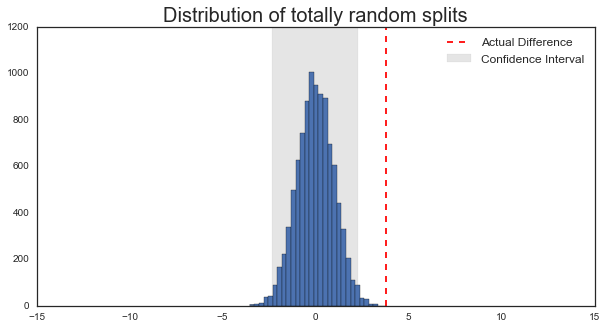

In [15]:
# Let's look at the distribution of differences when voting is *totally* random
f, ax = plt.subplots(figsize=(10, 5))
_ = ax.hist(diff, bins=30)
_ = ax.axvline(actual_diff, color='r', ls='--')
axfill = ax.fill_between([clo, chi], *ax.get_ylim(), alpha=.1, color='k')
ax.set_title('Distribution of totally random splits', fontsize=20)
ax.legend([ax.lines[0], axfill], ['Actual Difference', 'Confidence Interval'], fontsize=12)
_ = plt.setp(ax, xlim=[-15, 15])

For a vote to be “different” than 50%, it’d need to be outside our margin of error described by the grey rectangle. In this case, it seems that a totally random vote yields about 2% points of spread around 0, and that the recorded vote difference (~4%) is outside of the margin of error for 50%. So maybe we can conclude that the Brexit vote was significantly different from a random 50/50 vote.

BUT – we also know that people don’t vote completely randomly. They are influenced by external factors, they talk to one another, they tend to vote similarly to those around them. This is why everybody could predict which districts would vote “yes” and which would vote “no” well before the election.

So, let’s build that in to our simulation…

Simulating a not-completely-random population
---
So how exactly do we simulate the fact that people don’t vote totally randomly? There are a lot of ways to do this, but I’ll take the semi-arbitrary decision to say that we could expect the same pattern of voting to occur within a district. That is – we can simulate random district votes instead of random individual votes. Moreover, we’ll then weight that district’s percentage split by an amount proportional to that district’s size. Intuitively it doesn’t seem like this should make much difference in our simulation (we’re still totally randomly choosing the yes/no split), but let’s see what happens…

First, I grabbed a list of each UK voting district, along with its size…

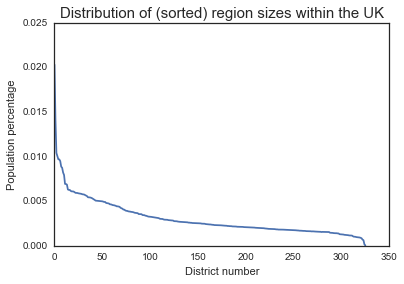

In [9]:
# UK Population data pulled from
# https://en.wikipedia.org/wiki/List_of_English_districts_by_population
populations = pd.read_csv('data/uk_population.csv', header=None)#, index_col=0)
#Rank,  District,  Population, Type, Ceremonial_county, Historic_county, English_Region
header = ['Rank','District', 'Population', 'Type', 'Ceremonial_County', 'Historic_County', 'English_Region']
populations.columns = header

# Convert population to numbers
#populations['Population'] = pd.to_numeric(populations['Population'].str.replace(',', ''))

# Now, turn these populations into percentages
n_areas = populations.shape[0]
total_population = populations['Population'].sum()
populations['percent'] = populations['Population'].astype(float) / total_population
plt.plot(populations['percent'])
plt.title('Distribution of (sorted) region sizes within the UK', fontsize=15)
plt.xlabel('District number')
plt.ylabel('Population percentage')

In [28]:
area_splits = np.random.rand(n_areas)
len(np.vstack([area_splits, 1 - area_splits]))

2

Now, we’ll run the simulation. On each iteration, all the districts vote totally randomly. Then, the difference between “yes” and “no” is calculated for each. Finally, these differences are combined in a weighted average, where the weights are proportional to the district sizes. This means that bigger districts have a larger influence on the outcome, mimicking the way that the UK tallies votes.

In [16]:
diff = np.zeros(n_votes)
for ii in tqdm(range(n_votes)):
    # Define a random split yes vs. no for each area
    area_splits = np.random.rand(n_areas)
    area_splits = np.vstack([area_splits, 1 - area_splits])
    yes, no = area_splits
    
    # Now, calculate the difference and average these together, weighted by the area size
    diffs = yes - no
    diffs = np.average(diffs, weights=populations['percent'])
    diff[ii] = diffs * 100

100%|██████████| 10000/10000 [00:00<00:00, 11391.74it/s]


In [17]:
# Here we calculate 99% confidence interval on the difference
clo, chi = np.percentile(diff, [.5, 99.5])

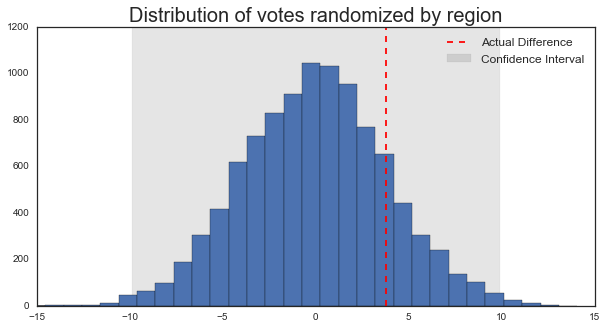

In [18]:
# Let's look at the distribution of differences
# This time, voting is randomized for each region
f, ax = plt.subplots(figsize=(10, 5))
_ = ax.hist(diff, bins=30)
_ = ax.axvline(actual_diff, color='r', ls='--')
axfill = ax.fill_between([clo, chi], *ax.get_ylim(), alpha=.1, color='k')
ax.set_title('Distribution of votes randomized by region', fontsize=20)
ax.legend([ax.lines[0], axfill], ['Actual Difference', 'Confidence Interval'], fontsize=12)
_ = plt.setp(ax, xlim=[-15, 15])

Now we see a different sort of picture. Randomizing votes by district instead of by individual greatly increased the variability in the outcome. So much so that the “true” results from the Brexit now fall well within our confidence interval.

In [2]:
import qgrid

qgrid.nbinstall(overwrite=True,user=True)

In [3]:
populations = pd.read_csv('data/uk_population.csv', header=None)#, index_col=0)


In [4]:
qgrid.show_grid(populations)

Note: Data Manipulation
---
To make data suit our neeed, it is always a big problem. 

Here, the data of UK population got from wiki page and from several tables. Put the data together on file, created in sub-folder, ```data```, by copy and paste; note that the population sizes had to be converted to formal format:

```
  1,234,567  -> 1234567
```  
, for instance, which could be done by 
<code style="color:red">
  pd.to_numeric(populations['Population'].str.replace(',', ''))
</code>

Concluding thoughts?
---
So what can we conclude from something like this? The point of this article isn’t to say that this particular simulation proves anything about the Brexit vote, but it does bring up an important point: 

```
we need to account for randomness whenever we aggregate data that we’ve collected.
```

When deciding whether to make a gigantic decision that will affect millions of people, we should be reasonably certain that the people’s opinion is clear. Choosing a 50/50 split as a cutoff means that we could potentially make such a decision because of random chance. Doesn’t sound like a great way to conduct national policy to me.

What could we do instead? There’s the hard part. But the short answer is that we could include some idea of random variability in our voting rules. For example, we could require that this kind of “should we deviate from the norm” decision exceeds the results expected from a totally random vote. Settling on this uncertainty limit is not a simple task, but then again I wouldn’t want to bet 2 trillion dollars worth of global economy on a coin flip.



Extra: Adding a short term swing
---
As I mentioned above, deciding how to simulate the votes involves making assumptions about how things will go. I tried to keep the simulation as simple as possible in order to make a point, but you could include extra components as well.

For example, what if we chose a random subset of districts in the UK and swung their vote several percentage points in one random direction? This might happen if an eye-catching event caused sentiment to momentarily swing in one direction or another. In the long run each district’s sentiment would probably ease back into it’s “natural” split, but since votes happen on one day, these short-term factors can play an important role.

We can build this into our simulation…



In [19]:
# Here we define a percentage of districts that undergo a sudden swing in voter opinion
perc_swing_amt = .1
perc_swing_districts = .2
n_perc_swing_districts = int(n_areas * perc_swing_districts)

In [29]:
n_perc_swing_districts

65

In [20]:
# Now, re-run the simulation including the random swing.
diff = np.zeros(n_votes)
for ii in tqdm(range(n_votes)):
    # Define a random split yes vs. no for each area
    area_splits = np.random.rand(n_areas)
    
    # Define a random swing across a subset of random districts
    swing = perc_swing_amt * np.random.choice([-1, 1])
    ixs_swing = np.random.choice(range(n_areas), n_perc_swing_districts, replace=False)
    area_splits[ixs_swing] = np.clip(swing + area_splits[ixs_swing], 0, 100)
    
    # Now calculate the opposing side amount and average
    area_splits = np.vstack([area_splits, 1 - area_splits])
    yes, no = area_splits
    
    # Now, calculate the difference and average these together, weighted by the area size
    diffs = yes - no
    diffs = np.average(diffs, weights=populations['percent'])
    diff[ii] = diffs * 100

100%|██████████| 10000/10000 [00:02<00:00, 4263.06it/s]


In [21]:
# Here we calculate 99% confidence interval on the difference
clo, chi = np.percentile(diff, [.5, 99.5])

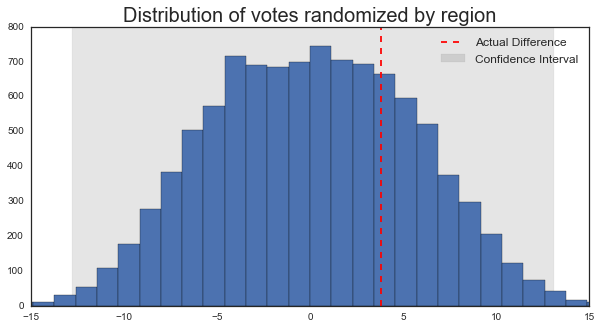

In [22]:
# Let's look at the distribution of differences
f, ax = plt.subplots(figsize=(10, 5))
_ = ax.hist(diff, bins=30)
_ = ax.axvline(actual_diff, color='r', ls='--')
axfill = ax.fill_between([clo, chi], *ax.get_ylim(), alpha=.1, color='k')
ax.set_title('Distribution of votes randomized by region', fontsize=20)
ax.legend([ax.lines[0], axfill], ['Actual Difference', 'Confidence Interval'], fontsize=12)
_ = plt.setp(ax, xlim=[-15, 15])

Uncertainty increases variation
---
It looks like now our confidence intervals are even wider than before. This is becase basically any change to our voting system that deviates away from a completely random 50/50 split will increase the variability in the outcome.

